In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(2)

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,...,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,7,7,0,1500-1559,3,3,26,160,American Airlines Inc.,19534,...,Chicago O'Hare International,0.0,0.0,0.0,95.0,4.25,0.237709,0.273236,0.222538,0.255479
1,4,1,0,1300-1359,4,4,63,50,SkyWest Airlines Inc.,18788,...,El Paso International,0.0,0.0,0.0,71.0,11.41,0.154651,0.121849,0.237972,0.197503


Feature engineering

In [5]:
columns_to_encode = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data for each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# df[columns_to_encode] = df[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))


In [6]:
# changing dep_time_blk to starting time
df['DEP_TIME_BLK'] = df['DEP_TIME_BLK'].str.split('-').str[0].astype(int) // 100

In [7]:
percent_missing = df.isna().sum() / df.shape[0]
percent_missing.sort_values(ascending=False)

MONTH                            0.0
DAY_OF_WEEK                      0.0
DAY_HISTORICAL                   0.0
DEP_AIRPORT_HIST                 0.0
CARRIER_HISTORICAL               0.0
AWND                             0.0
TMAX                             0.0
SNWD                             0.0
SNOW                             0.0
PRCP                             0.0
PREVIOUS_AIRPORT                 0.0
LONGITUDE                        0.0
LATITUDE                         0.0
DEPARTING_AIRPORT                0.0
PLANE_AGE                        0.0
GROUND_SERV_PER_PASS             0.0
FLT_ATTENDANTS_PER_PASS          0.0
AVG_MONTHLY_PASS_AIRLINE         0.0
AVG_MONTHLY_PASS_AIRPORT         0.0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.0
AIRLINE_FLIGHTS_MONTH            0.0
AIRPORT_FLIGHTS_MONTH            0.0
CARRIER_NAME                     0.0
NUMBER_OF_SEATS                  0.0
CONCURRENT_FLIGHTS               0.0
SEGMENT_NUMBER                   0.0
DISTANCE_GROUP                   0.0
D

In [8]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index([], dtype='object')

EDA

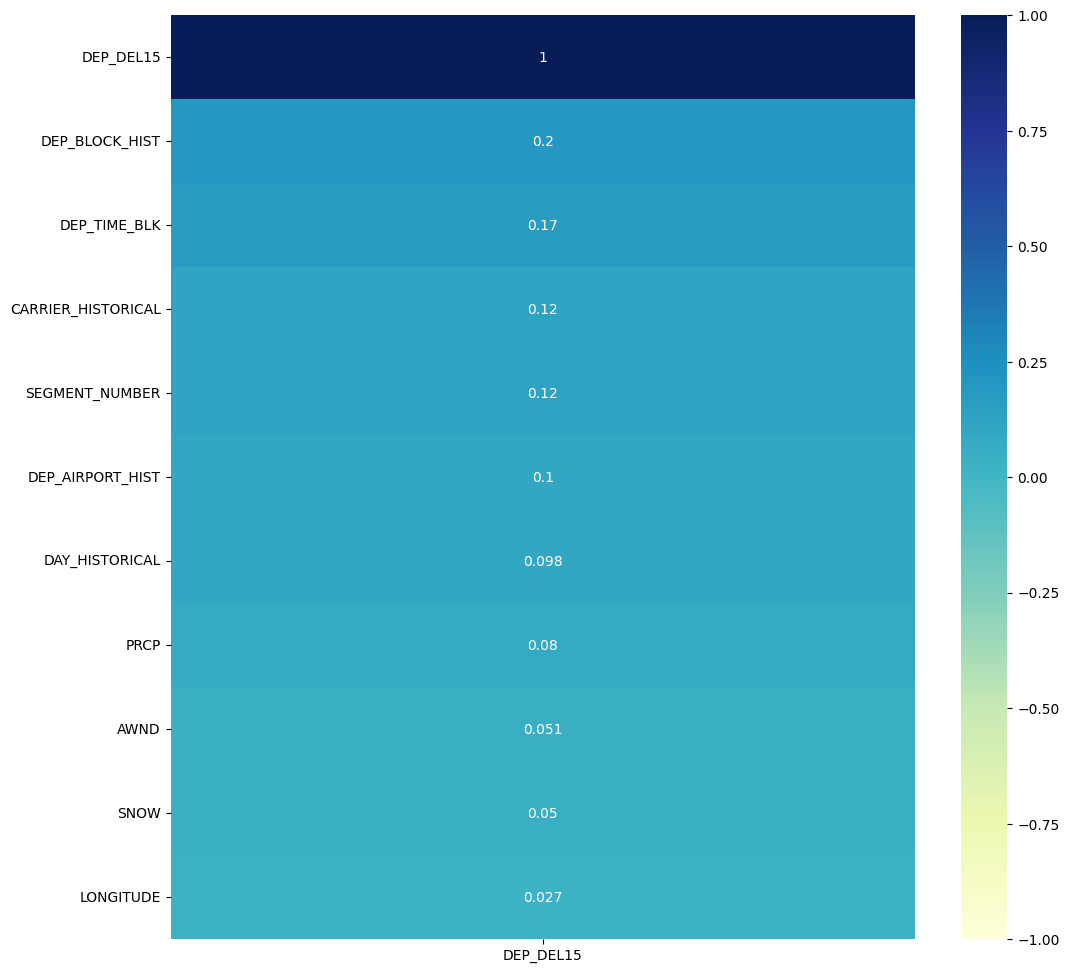

In [20]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[['DEP_DEL15']].sort_values('DEP_DEL15').tail(11),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

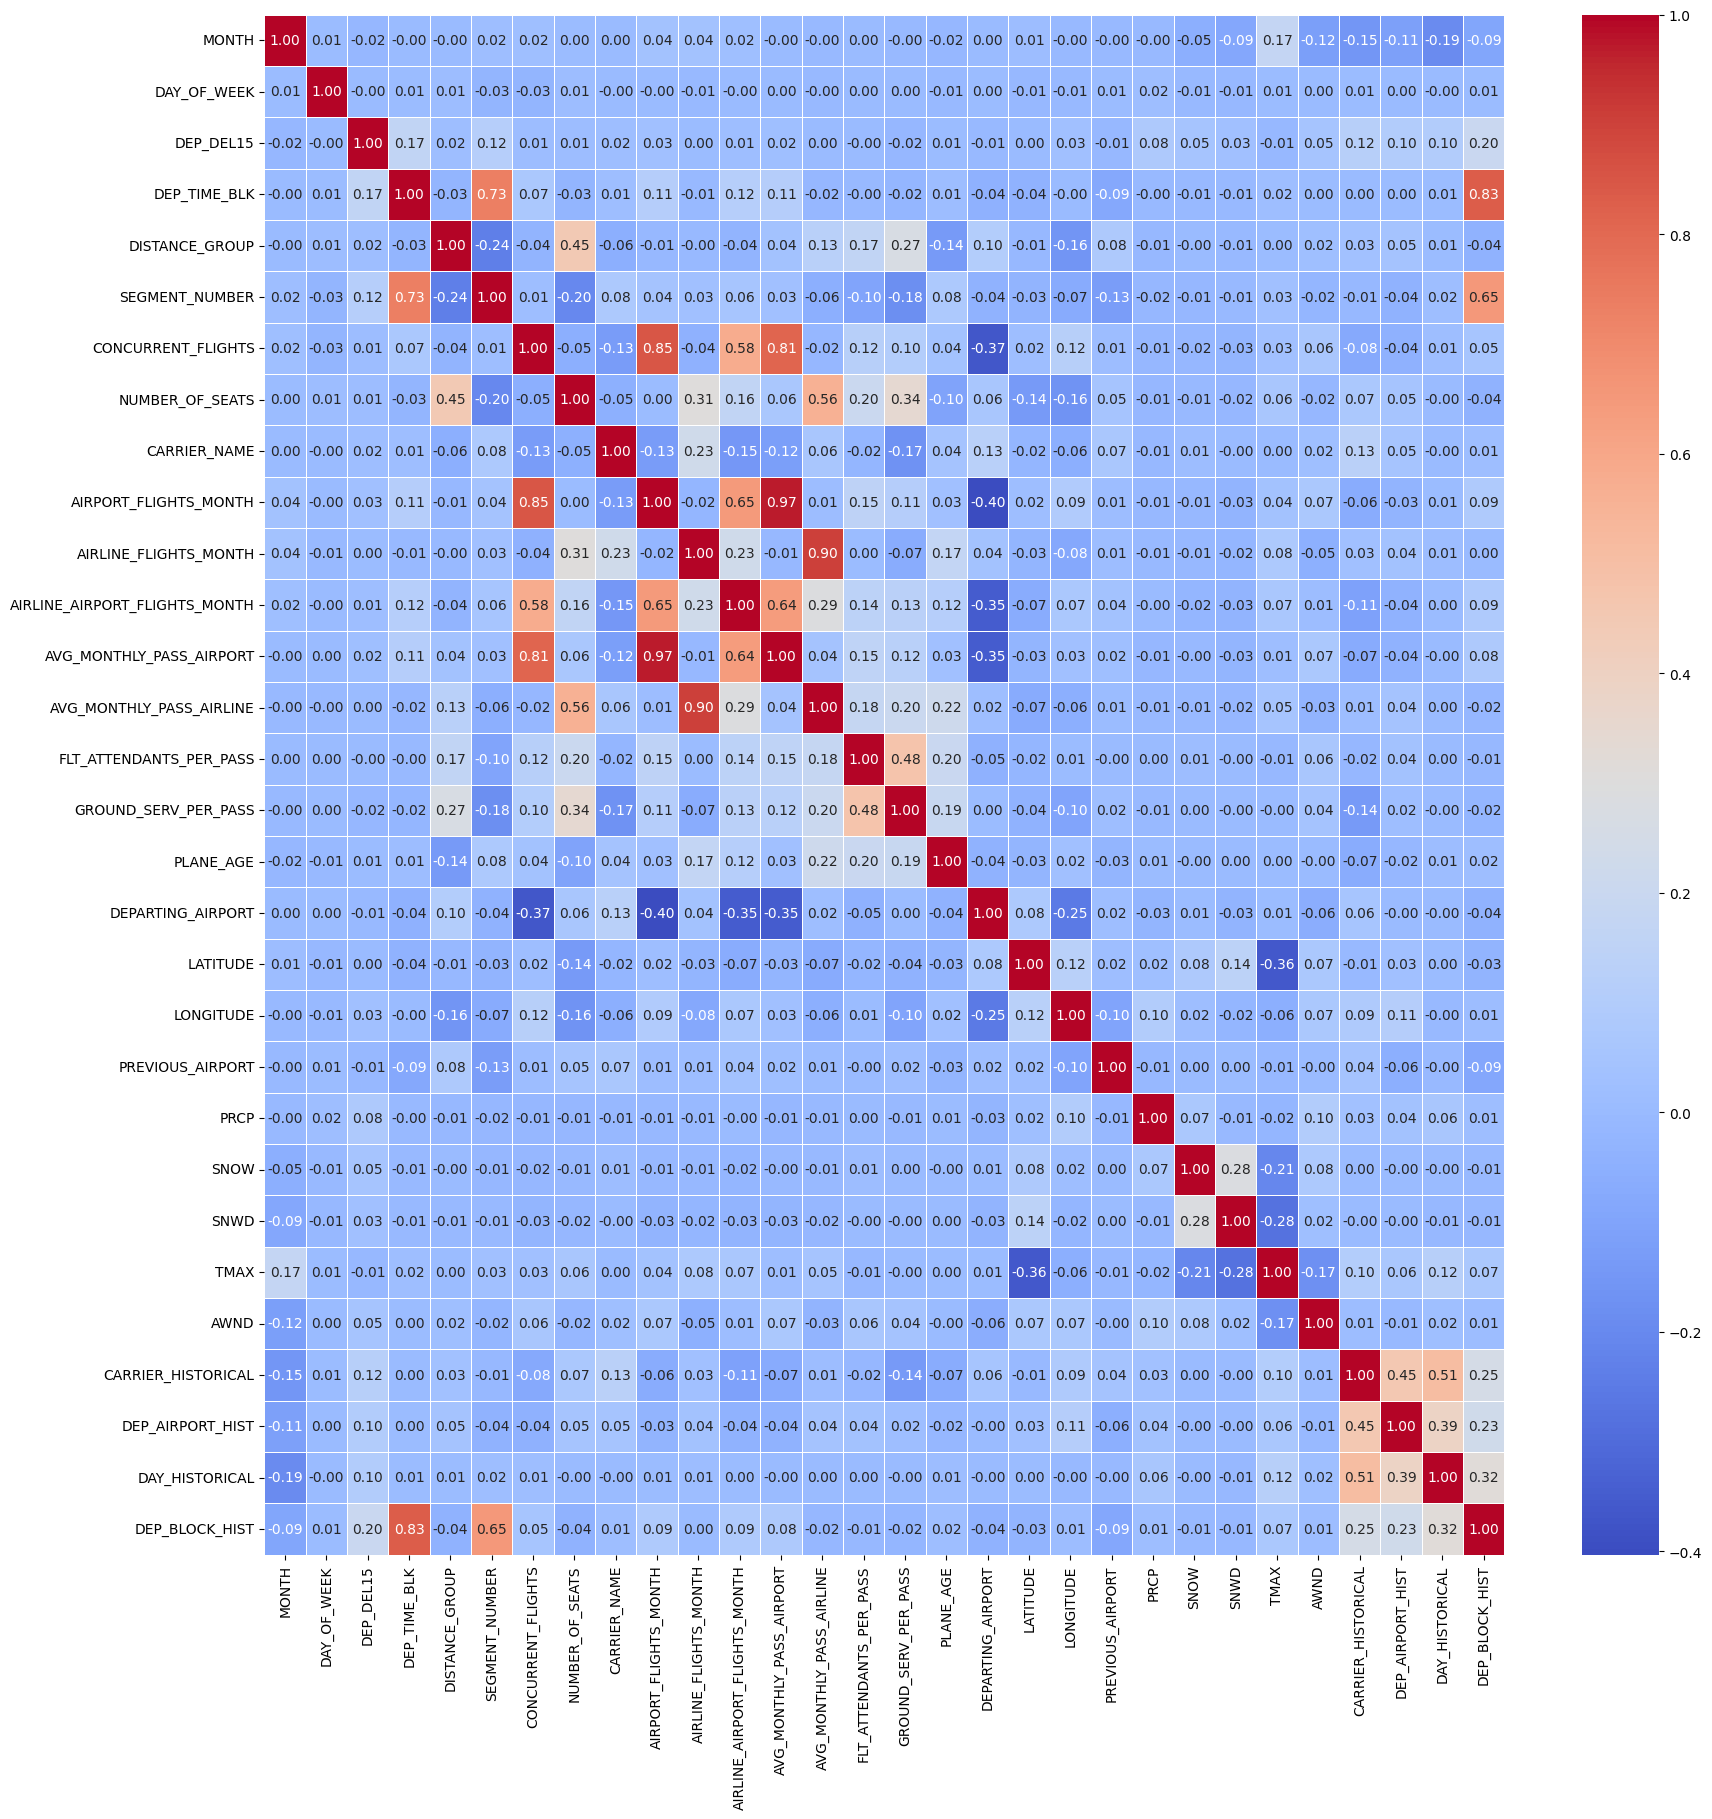

In [11]:
plt.figure(figsize=(20, 20))

# Create a heatmap with annotations
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

Modelling

In [12]:
X = df.drop('DEP_DEL15', axis=1)
y = df['DEP_DEL15']

#split data into train-test 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

We are using GaussianNB because it's better fitted for continuous numerical features that can be assumed to follow a Gaussian (normal) distribution.

In [13]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print(f"Accuracy: {acc}")
print(f"F1 Score:{f1}")

Accuracy: 0.8117261018262594
F1 Score:0.8960803744098204


Confusion Matrix:
[[737428      0]
 [171041      0]]


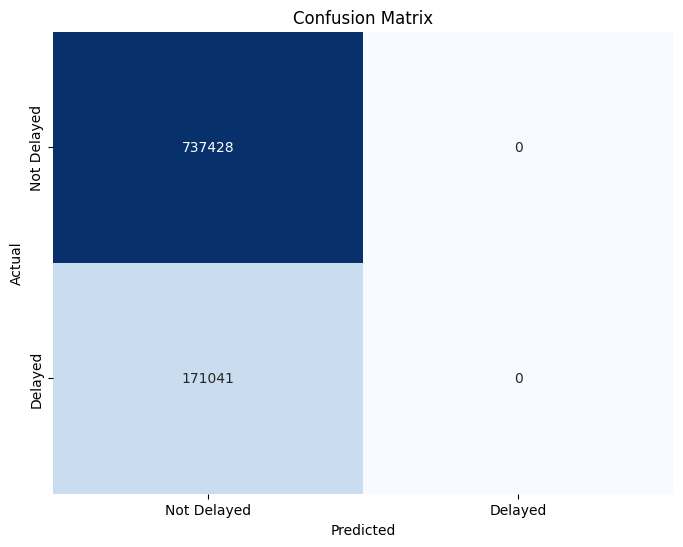


Classification Report:


c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90    737428
           1       0.00      0.00      0.00    171041

    accuracy                           0.81    908469
   macro avg       0.41      0.50      0.45    908469
weighted avg       0.66      0.81      0.73    908469



c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aghab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

# display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Delayed', 'Delayed'], yticklabels=['Not Delayed', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
